In [2]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')
import sys
# TODO: Change the path below to the path where your folder locates
sys.path.append('/content/gdrive/MyDrive/CM146_PSet2')

Mounted at /content/gdrive


In [3]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os
import time

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

In [4]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [22]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        #temp_array = np.ones((n,d+1))
        #temp_array[:, 1:] = X
        #Phi = temp_array
        #m = self.m_

        # part g: modify to create matrix for polynomial model
        temp_array = np.ones((n, self.m_+1))
        for i in range(self.m_+1):
          temp_array[:, i] = np.power(X,i).T
        Phi = temp_array

        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) : #default eta = 0.01
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None:
                eta = 1/(1+t) # change this line
            else :
                eta = eta_input

            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            update = (np.dot(X, self.coef_) - y).dot(X)
            self.coef_ = self.coef_ - 2*eta*update

            # track  error
            # hint: you cannot use self.predict(...) to make the predictions
            #y_pred = y # change this line
            y_pred = np.dot(X, self.coef_)
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d'%(t+1))

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        self.coef_ = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        #       be sure to update self.coef_ with your solution

        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###
        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        all_cost = (self.predict(X) - y)**2
        cost = np.sum(all_cost)
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n,d = X.shape
        error = np.sqrt(self.cost(X,y)/n)
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...
Investigating linear regression...
40.233847409671
GRADIENT DESCENT
eta= 0.0001
number of iterations: 10000
Coefficients: [ 2.27044798 -2.46064834]
Cost: 4.0863970367957645
Runtime in ms: 206.79926872253418
__________
eta= 0.001
number of iterations: 7020
Coefficients: [ 2.4464068 -2.816353 ]
Cost: 3.9125764057919463
Runtime in ms: 135.9248161315918
__________
eta= 0.01
number of iterations: 764
Coefficients: [ 2.44640703 -2.81635346]
Cost: 3.912576405791487
Runtime in ms: 18.64147186279297
__________
eta= 0.1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-22-72e18ac73027>:107: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
<ipython-input-22-72e18ac73027>:111: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
<ipython-input-22-72e18ac73027>:101: RuntimeWarning: invalid value encountered in subtract
  self.coef_ = self.coef_ - 2*eta*update


number of iterations: 10000
Coefficients: [nan nan]
Cost: nan
Runtime in ms: 206.4347267150879
__________
CLOSED FORM SOLUTION
Coefficients: [ 2.44640709 -2.81635359]
Cost: 3.9125764057914636
Runtime in ms: 1.6756057739257812
Investigating polynomial regression...


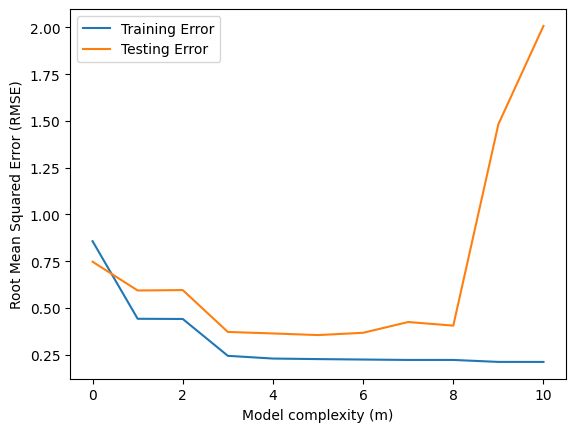

Done!


In [23]:
######################################################################
# main
######################################################################

def part_d(train_data):
  print("GRADIENT DESCENT")
  eta_vals = [0.0001, 0.001, 0.01, 0.1]
  for i in eta_vals:
    print("eta=", i)
    model = PolynomialRegression()
    start_time = time.time()
    model.fit_GD(train_data.X, train_data.y, eta=i)
    end_time = time.time()
    print("Coefficients:", model.coef_)
    print("Cost:", model.cost(train_data.X, train_data.y))
    runtime = (end_time-start_time)*1000
    print("Runtime in ms:",runtime)
    print("__________")
  print("================")

def part_e(train_data):
  model = PolynomialRegression()
  start_time = time.time()
  model.fit(train_data.X, train_data.y)
  end_time = time.time()
  runtime = (end_time-start_time)*1000
  print("Coefficients:", model.coef_)
  print("Cost:", model.cost(train_data.X, train_data.y))
  print("Runtime in ms:",runtime)
  print("================")


def part_f(train_data):
  model = PolynomialRegression()
  start_time = time.time()
  model.fit_GD(train_data.X, train_data.y)
  end_time = time.time()
  print("Coefficients:", model.coef_)
  print("Cost:", model.cost(train_data.X, train_data.y))
  runtime = (end_time-start_time)*1000
  print("Runtime in ms:",runtime)
  print("================")


  def trial():
    m = 2
    power = []
    for i in range(0,m+1):
      power.append(i)
    #print(power)

    some = [1,2,3,4,5]
    x = np.array(some)
    n, = x.shape
    print(n)
    temp_array = np.ones((n, m+1))
    for i in range(0,n):
      for pow in power:
        temp_array[i][pow] = x[i]**pow

    print(temp_array)


def main() :
    # load data
    # TODO: Use the abs path on your own Google Drive
    train_data = load_data('/content/gdrive/MyDrive/CM146_PSet2/regression_train.csv')
    test_data = load_data('/content/gdrive/MyDrive/CM146_PSet2/regression_test.csv')

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    # plot_data(train_data.X, train_data.y)
    # plot_data(test_data.X, test_data.y)

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print(model.cost(train_data.X, train_data.y))

    #part d: Check
    part_d(train_data)

    print("CLOSED FORM SOLUTION")

    #part e: Coefficients
    part_e(train_data)

    #part f:
    #part_f(train_data)
    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')

    m = np.arange(0,11,1)
    train_error = []
    test_error = []
    for deg in m:
      model = PolynomialRegression()
      model.m_ = deg
      model.fit(train_data.X, train_data.y)
      train_error.append(model.rms_error(train_data.X, train_data.y))
      test_error.append(model.rms_error(test_data.X, test_data.y))

    plt.plot(m, train_error, label="Training Error")
    plt.plot(m, test_error, label="Testing Error")
    plt.xlabel("Model complexity (m)")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.show()



    ### ========== TODO : END ========== ###




    print("Done!")

if __name__ == "__main__":
    main()
